<a href="https://colab.research.google.com/github/raissamiranda/Computational-statistical-physics/blob/main/AnnealingAndTSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated Annealing



Gabriela Moraes Miserani de Freitas - 2020006566

Isabella VIgnoli Gonçalves - 2020006655

Maria Luiza Leão - 2020100953

Raissa Miranda Maciel - 2020006965

### Introdução

Este trabalho utiliza a técnica de otimização Simulated Annealing. Inspirada na metalurgia, o algoritmo encontra soluções aproximadas de problemas de otimização em que é necessário encontrar o melhor arranjo delementos em um espaço de busca. A técnica se dá a partir de uma solução inicial aleatória, onde são realizadas pequenas alterações e seus resultados comparados com a anterior. Se a nova solução for melhor, ela é aceita automaticamente. Caso contrário, a decisão de aceitar ou não a solução pior é determinada em função da temperatura. Para evitar mínimos locais e ter uma solução ótima geral é necessário aceitar soluções piores temporariamente (geralmente, nas primeiras fases de busca, quando a temperatura ainda é alta).

Essa técnica pode ser utilizada para encontrar soluções do problema do Caixeiro Viajante, onde um viajante deve percorrer um conjunto de cidades, passando por cada uma exatamente uma vez e retornando à cidade de origem. Nesse caso, a energia está relacionada a distância percorrida e será usada como uma medida de qualidade da solução durante a busca. Se a nova solução gerada tiver uma energia (custo) menor significa que a distância nesse novo caminho foi menor.então a solução é aceita. O algoritmo tem o objetivo de minimizar a energia ao longo da busca.

### Imports iniciais

In [98]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Funções auxiliares

In [99]:
def gen_cities(N):
    cities = []
    for i in range(N):
        cities.append({
            "x": random.random(),
            "y": random.random()
        })
    return cities

In [100]:
def distance(cities):
    N = len(cities)
    dist = np.zeros(shape=(N,N))
    for i in range(N):
        for j in range(N):
            dist[i,j] = np.sqrt((cities[i]["x"]-cities[j]["x"])**2 + (cities[i]["y"]-cities[j]["y"])**2)
    return dist

In [101]:
def energy(N, dist, cam):
    ener = 0
    for i in range(N-1):
        ener += dist[cam[i],cam[i+1]]
    ener += dist[cam[0],cam[N-1]]
    return ener

In [102]:
def gen_new_path(N,cam):
    ncam = np.zeros(N,dtype=np.int16)
    i=np.random.randint(N)
    j=i
    while j==i:
        j=np.random.randint(N)
    if i>j:
        ini = j
        fim = i
    else:
        ini = i
        fim = j
    for k in range(N):
        if k >= ini and k <= fim:
            ncam[k] = cam[fim-k+ini]
        else:
            ncam[k] = cam[k]
    return ncam, ini, fim

In [103]:
def gen_new_d(N, dist,cam,ncam, ini, fim):
    esq = ini - 1
    if esq < 0:
        esq = N - 1
    dir = fim + 1
    if dir > N-1:
        dir = 0
    de = - dist[cam[esq],cam[ini]] -dist[cam[dir],cam[fim]] + dist[ncam[esq],ncam[ini]] + dist[ncam[dir],ncam[fim]]
    return de

In [104]:
def gen_graphs(energies, ener_points, Ti, dt, Tf):

    energias, = plt.plot([i for i in range (len(energies))],energies, label='Energias totais')
    pontos, = plt.plot([x[0] for x in ener_points], [x[1] for x in ener_points], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green", label="Após cada passo Monte Carlo")
    plt.xlabel('Número Interações')
    plt.ylabel('Energia')
    plt.title('Ti = ' + str(Ti) + ', dt = ' + str(dt) + ', Tf = ' + str(Tf))
    plt.legend(handles=[energias, pontos])
    plt.show()

In [105]:
def gen_graph_best_path(melhor_caminho, cities):
  X_plot = [cities[i]["x"] for i in melhor_caminho]
  X_plot.append(cities[melhor_caminho[0]]["x"])
  Y_plot = [cities[j]["y"] for j in melhor_caminho]
  Y_plot.append(cities[melhor_caminho[0]]["y"])
  plt.scatter(X_plot, Y_plot)
  plt.plot(X_plot, Y_plot)
  plt.title("Melhor caminho")
  plt.show()

In [106]:
def simulated_annealing(N, Ti, dt, Tf):
    cities = gen_cities(N)
    dist = distance(cities)
    T = Ti
    cam = [i for i in range(N)]
    energies = []
    ener_points = []
    melhor_caminho = cam
    melhor_energia = energy(N, dist, cam)
    while T > Tf:
      for i in range(100):
          ener = energy(N, dist, cam)
          energies.append(ener)
          ncam, ini, fim = gen_new_path(N,cam)
          de = gen_new_d(N,dist,cam,ncam, ini, fim)
          if random.random() < np.exp(-de/T) or de < 0:
              cam = ncam
      ener = energy(N, dist, cam)
      energies.append(ener)
      ener_points.append((len(energies),ener))
      if(ener < melhor_energia):
        melhor_energia = ener
        melhor_caminho = cam
      T = T * dt
    gen_graph_best_path(melhor_caminho, cities)
    gen_graphs(energies, ener_points, Ti, dt, Tf)
    print("-------------------------------------------------------------------")

In [107]:
def testes(N):
  simulated_annealing(N, 1, 0.8, 0.005)
  simulated_annealing(N, 10, 0.8, 0.005)
  simulated_annealing(N, 1, 0.99, 0.005)
  simulated_annealing(N, 10, 0.99, 0.005)
  simulated_annealing(N, 1, 0.8, 0.0001)
  simulated_annealing(N, 10, 0.8, 0.0001)
  simulated_annealing(N, 1, 0.99, 0.0001)
  simulated_annealing(N, 10, 0.99, 0.0001)

### Testes com 10 cidades

<IPython.core.display.Javascript object>

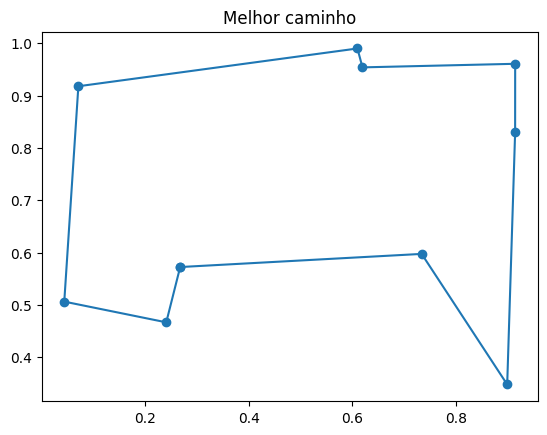

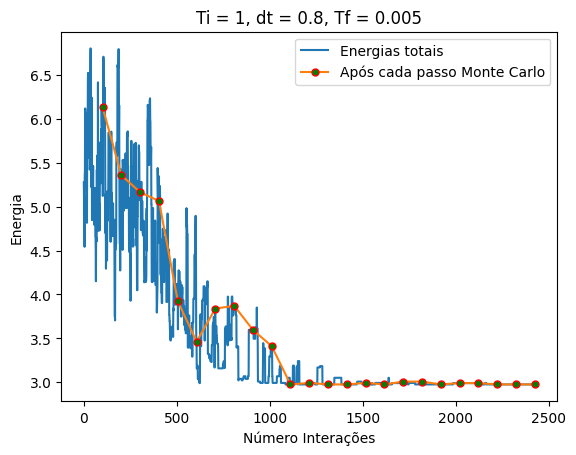

-------------------------------------------------------------------


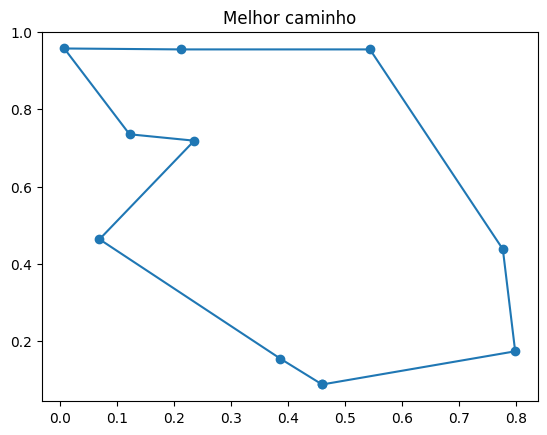

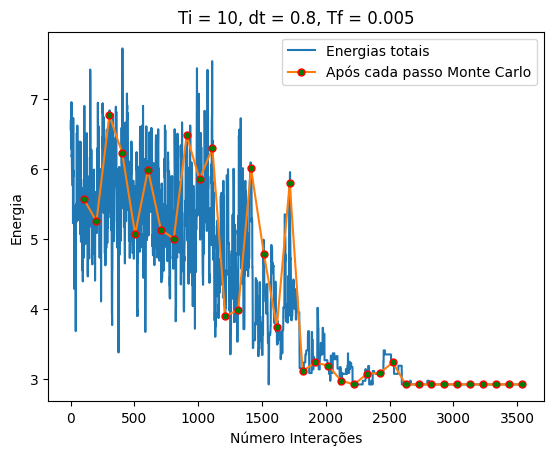

-------------------------------------------------------------------


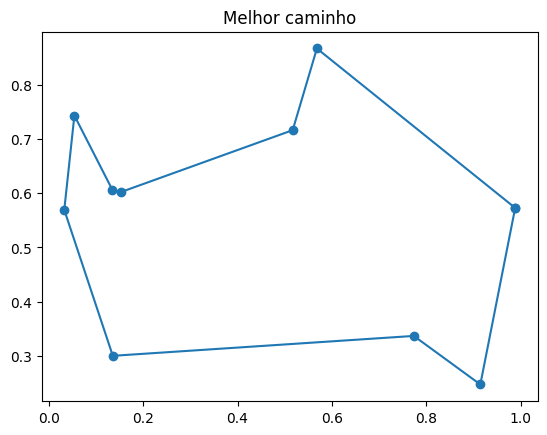

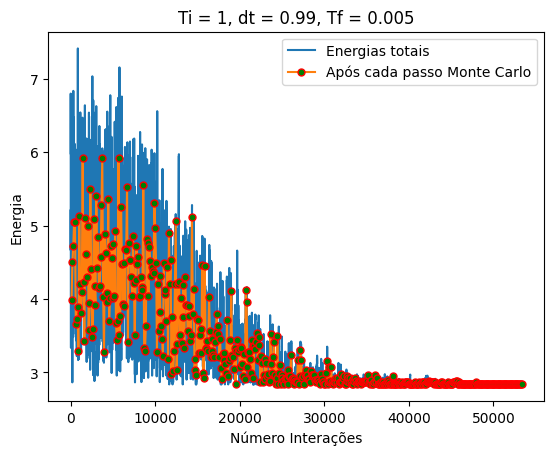

-------------------------------------------------------------------


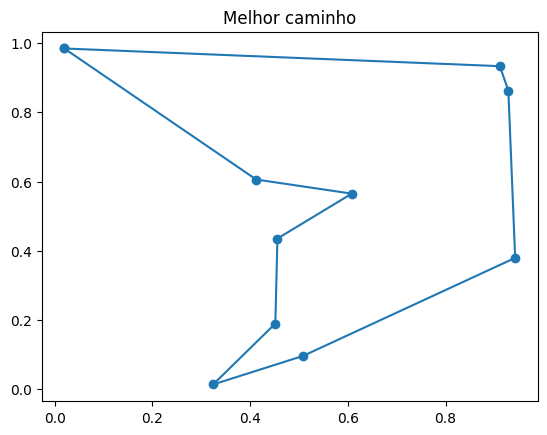

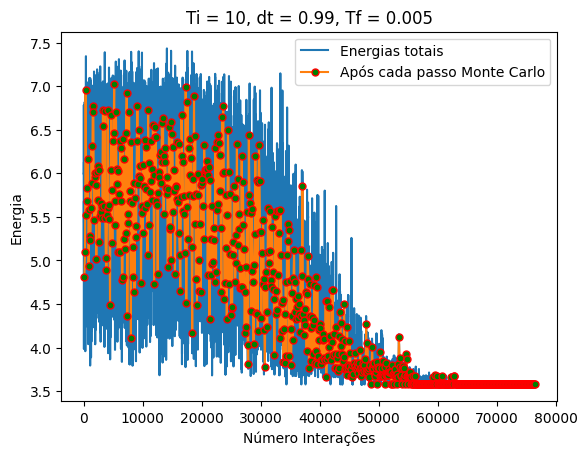

-------------------------------------------------------------------


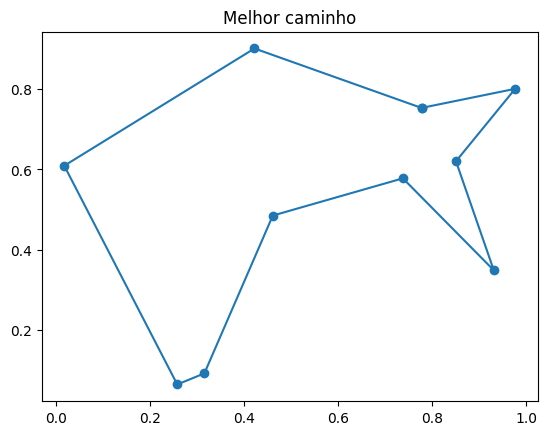

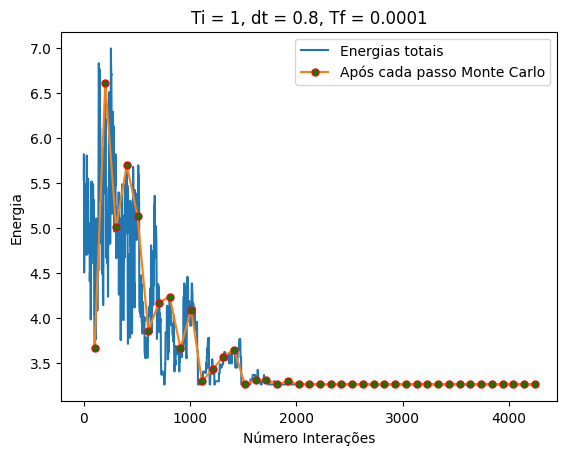

-------------------------------------------------------------------


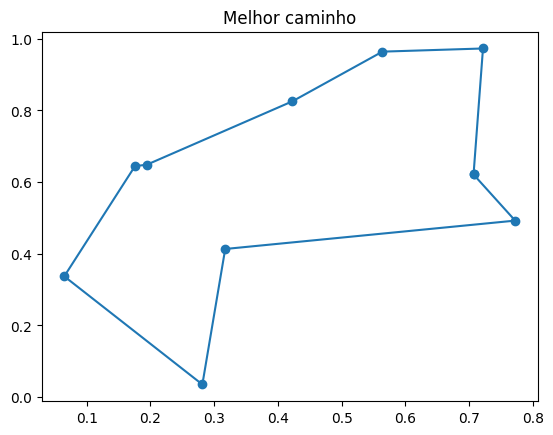

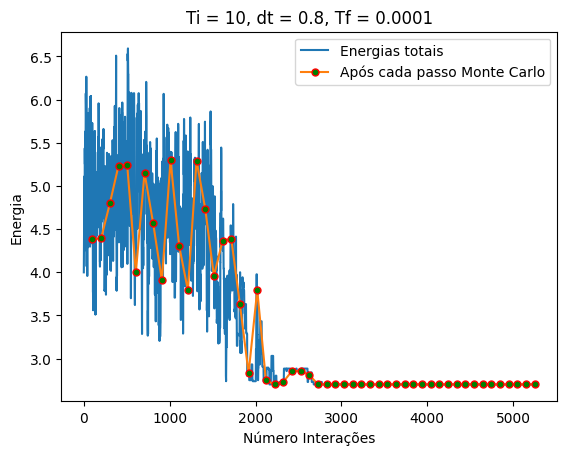

-------------------------------------------------------------------


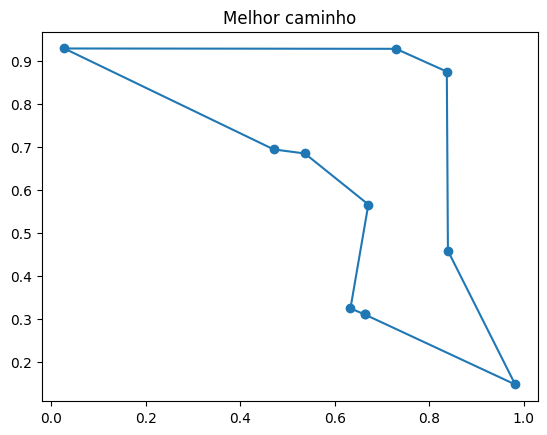

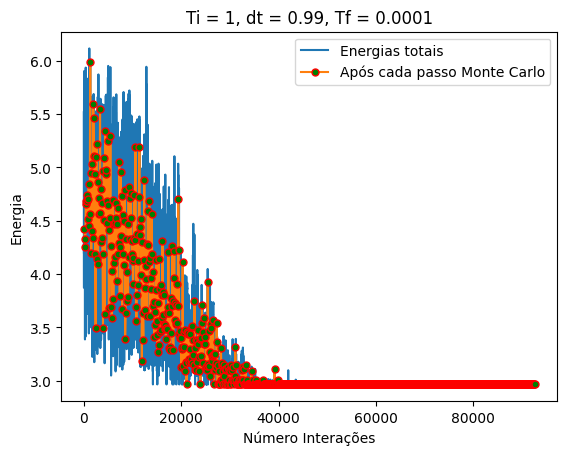

-------------------------------------------------------------------


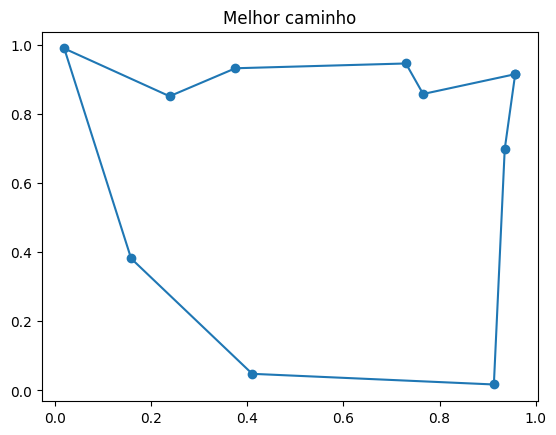

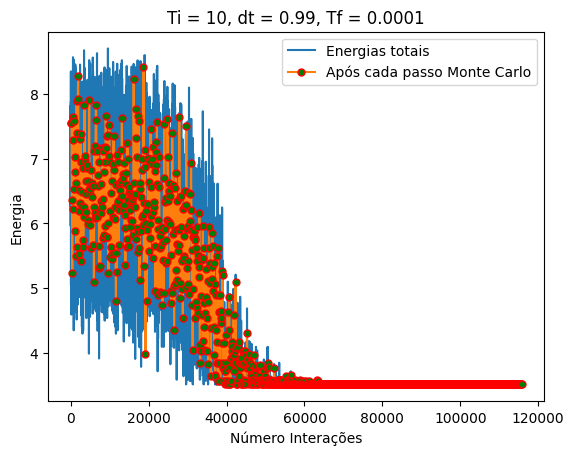

-------------------------------------------------------------------


In [108]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
testes(10)

### Testes com 30 cidades

<IPython.core.display.Javascript object>

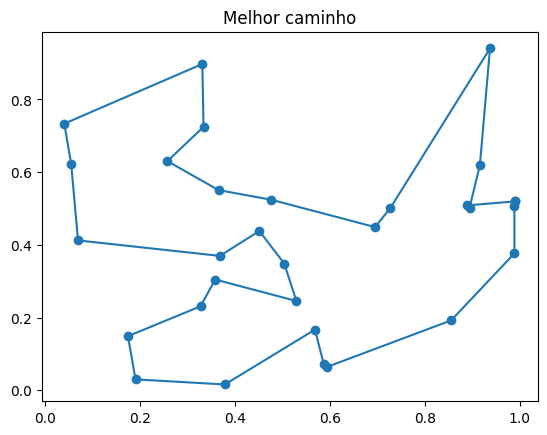

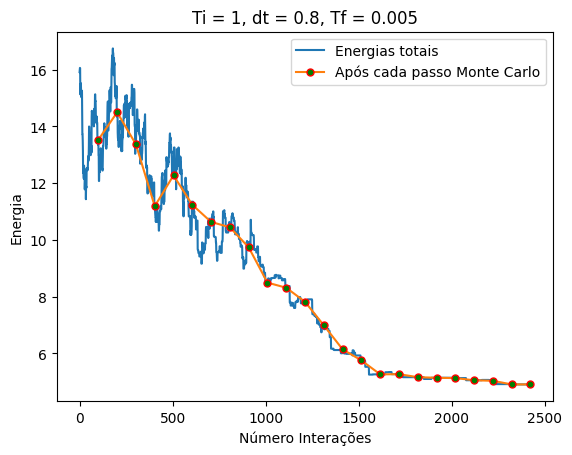

-------------------------------------------------------------------


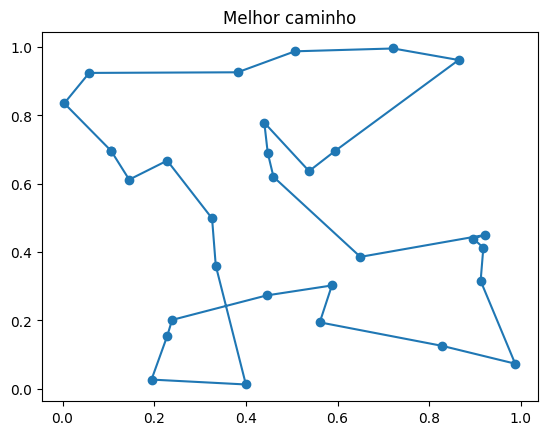

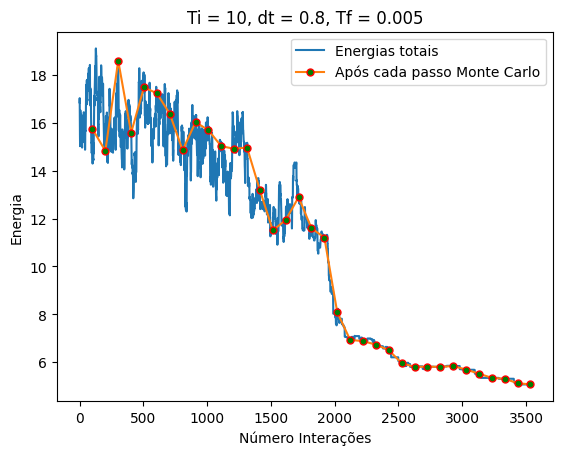

-------------------------------------------------------------------


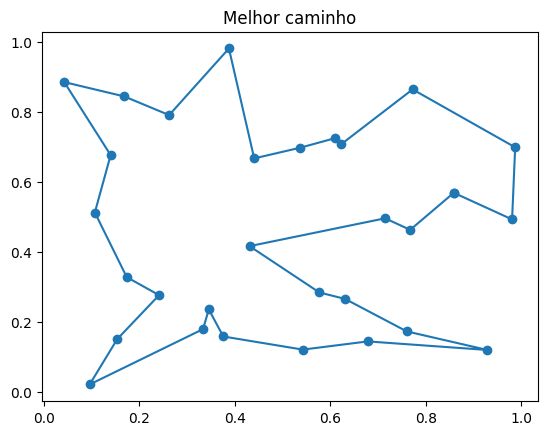

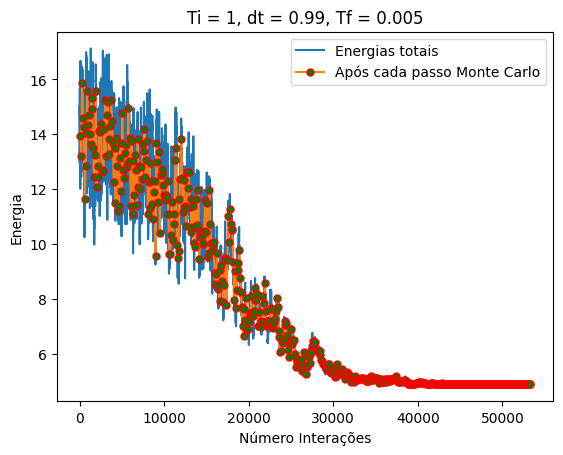

-------------------------------------------------------------------


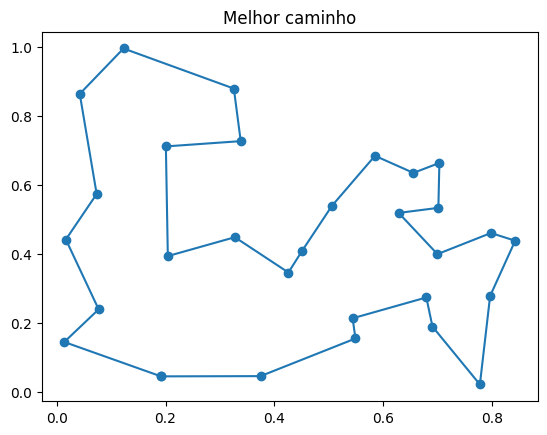

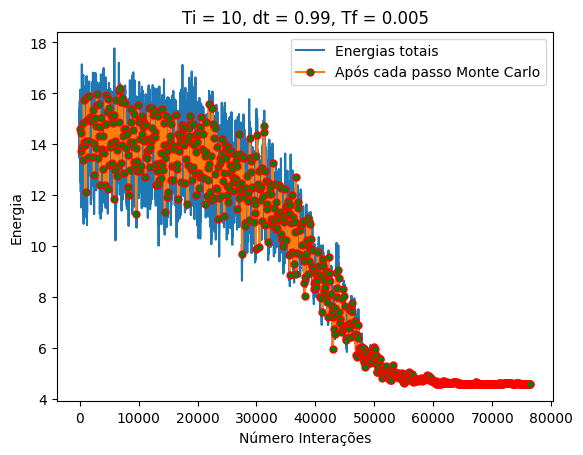

-------------------------------------------------------------------


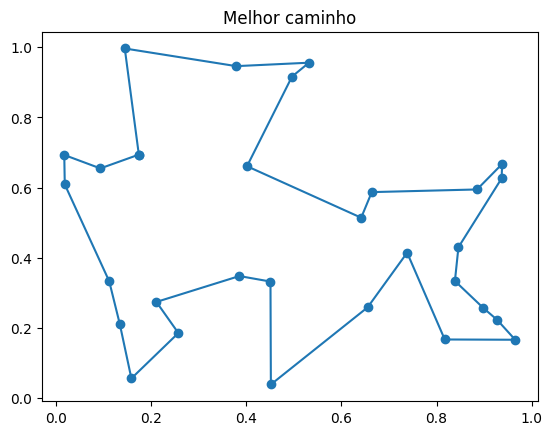

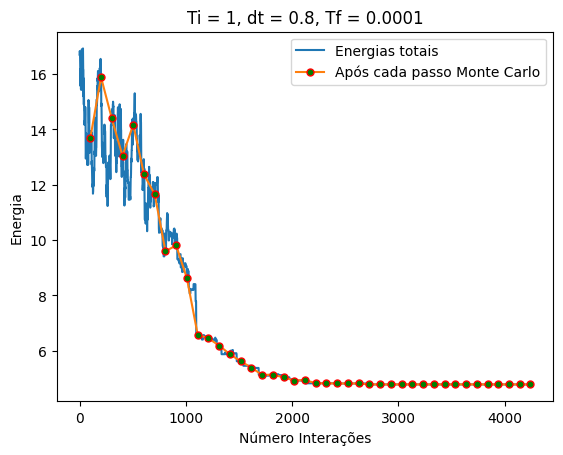

-------------------------------------------------------------------


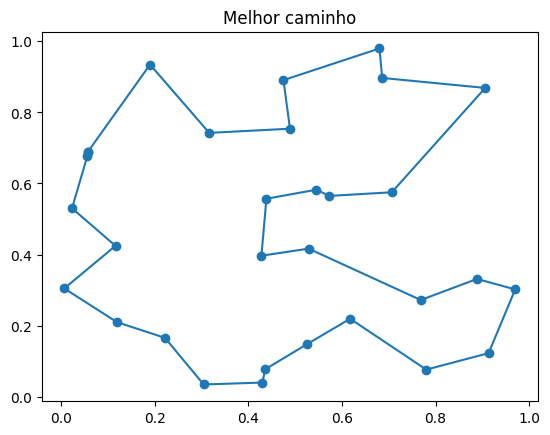

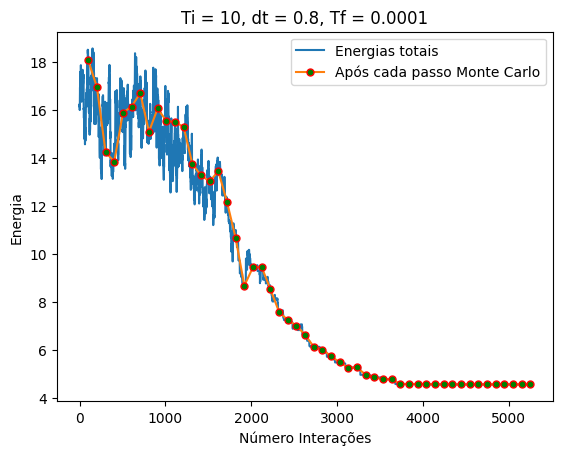

-------------------------------------------------------------------


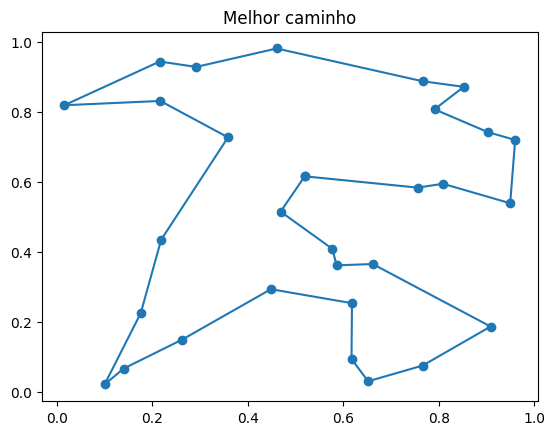

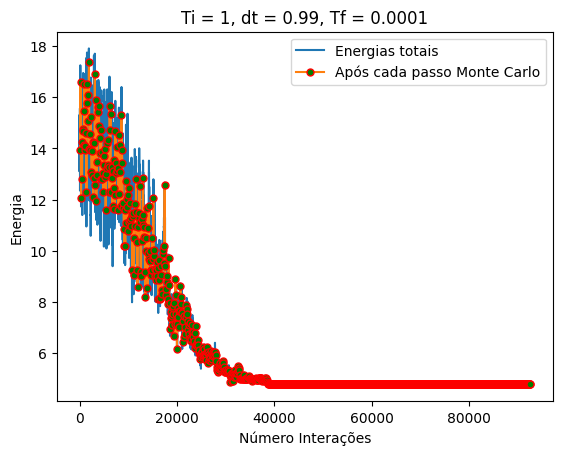

-------------------------------------------------------------------


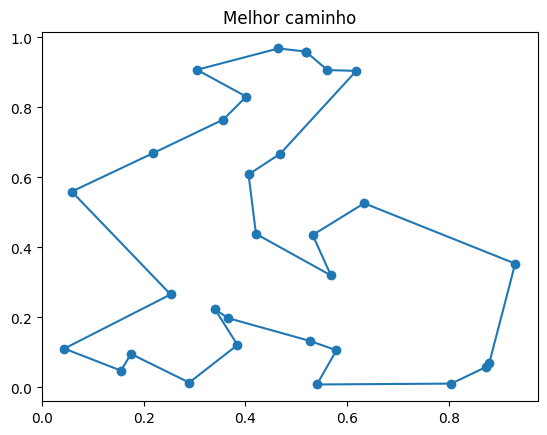

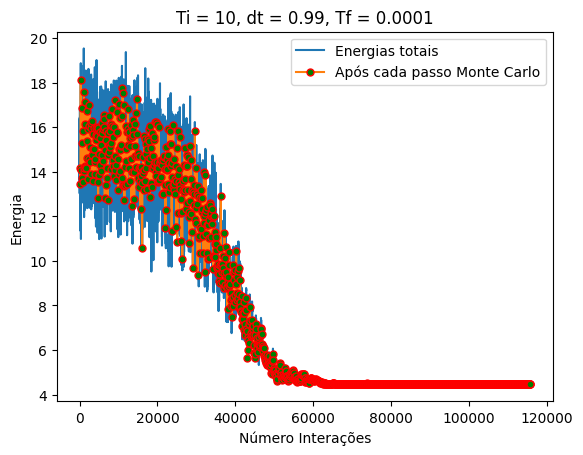

-------------------------------------------------------------------


In [109]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
testes(30)

### Testes com 60 cidades

<IPython.core.display.Javascript object>

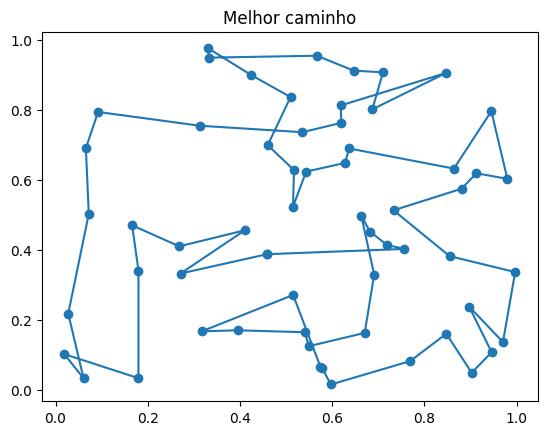

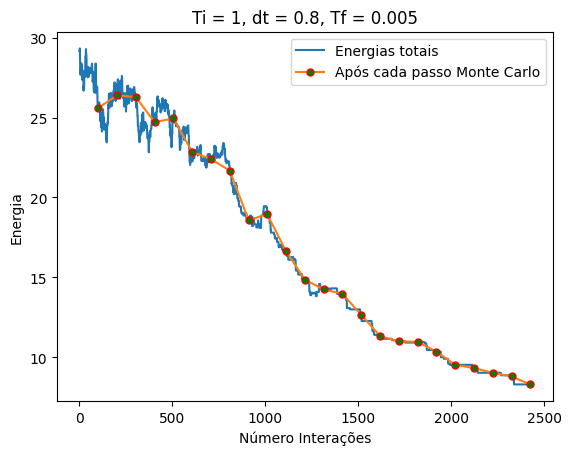

-------------------------------------------------------------------


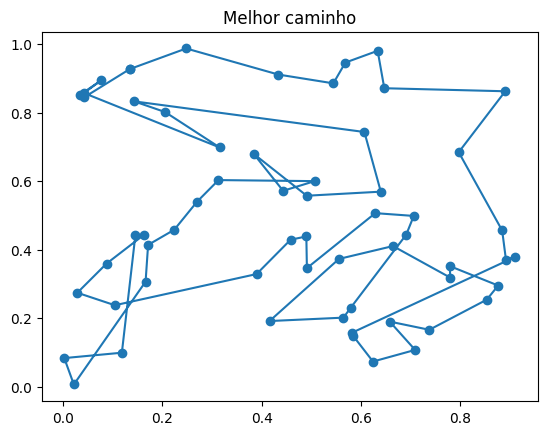

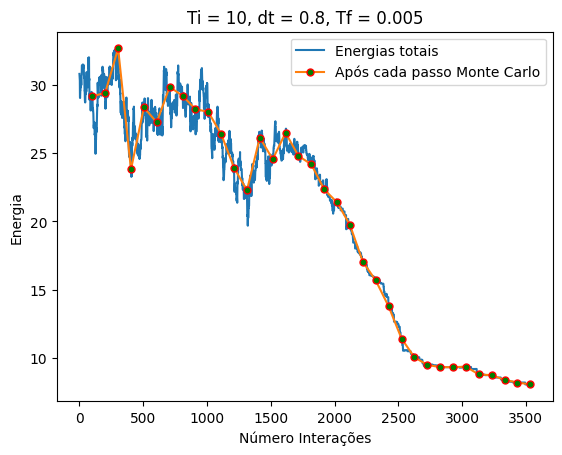

-------------------------------------------------------------------


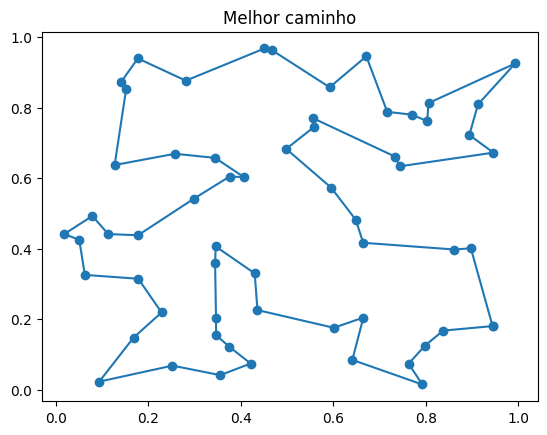

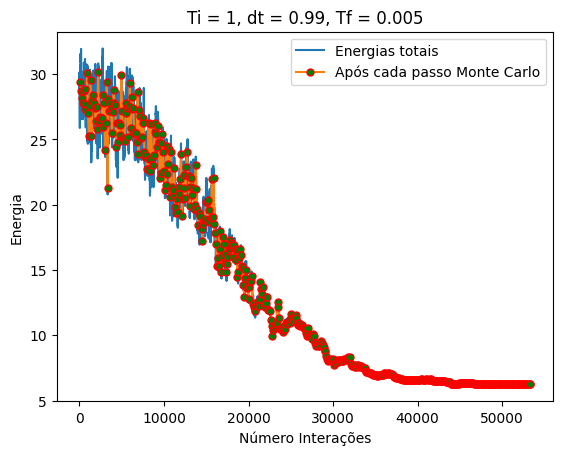

-------------------------------------------------------------------


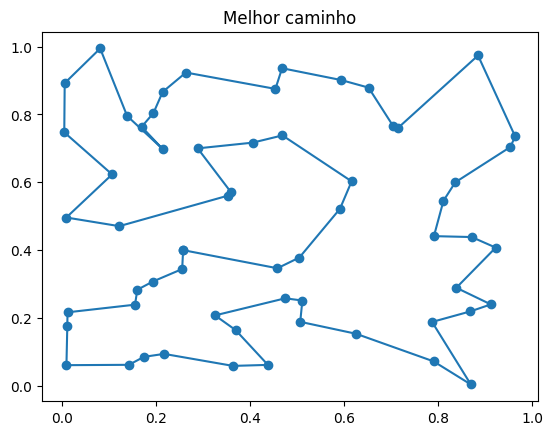

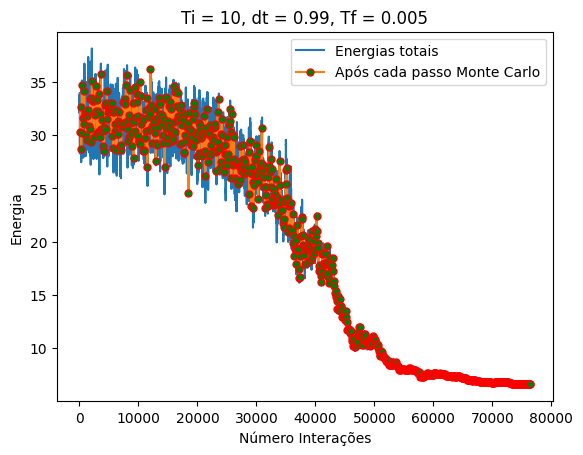

-------------------------------------------------------------------


<ipython-input-106-92e248dc0e50>:16: RuntimeWarning: overflow encountered in exp
  if random.random() < np.exp(-de/T) or de < 0:


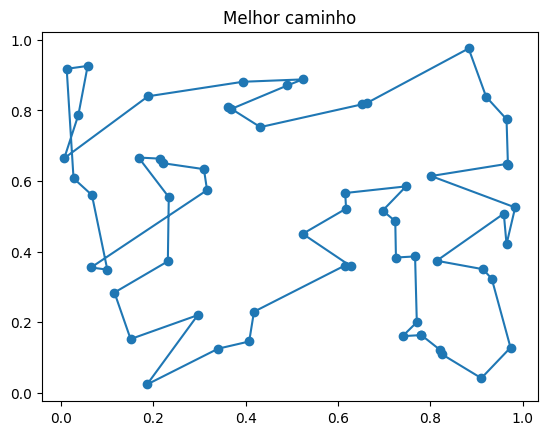

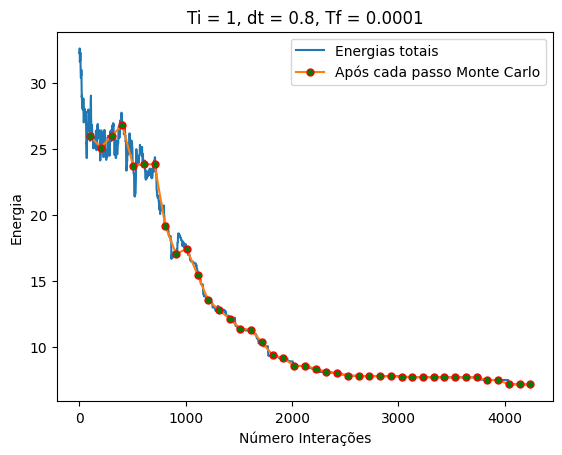

-------------------------------------------------------------------


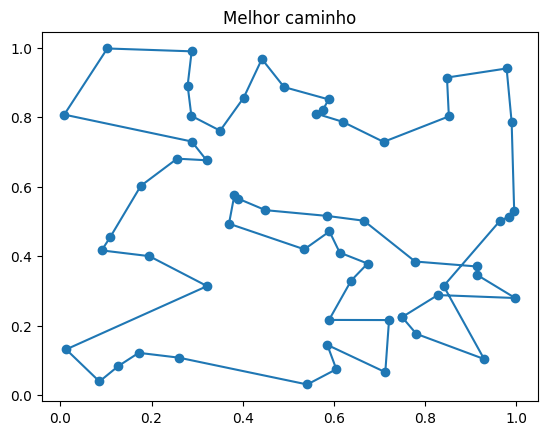

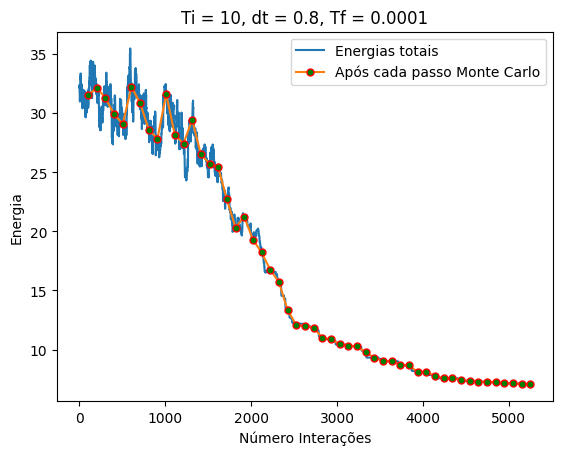

-------------------------------------------------------------------


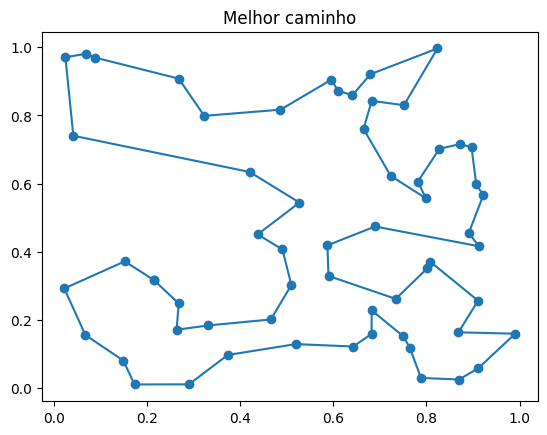

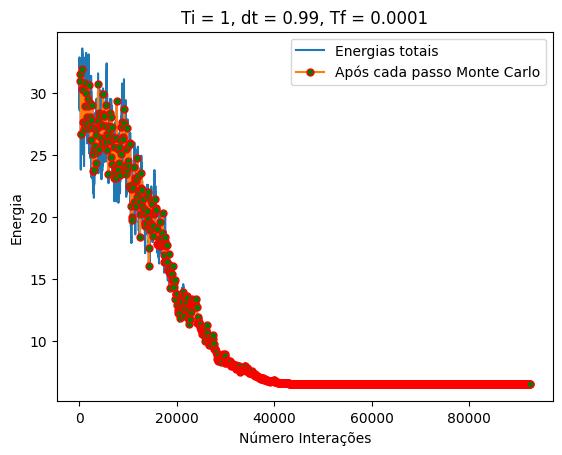

-------------------------------------------------------------------


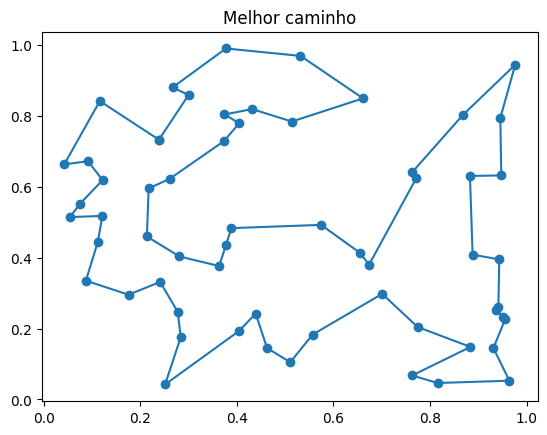

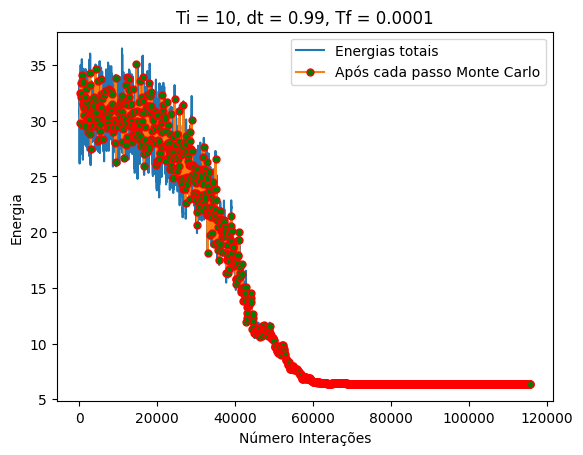

-------------------------------------------------------------------


In [110]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
testes(60)

### Conclusão


Com os testes realizados, é possível observar a relação entre o valor de dt (protocolo de redução de temperatura exponencial utilizado) com a quantidade de etapas do método, isto é, uma maior quantidade de pontos de diferentes valores nos gráficos. Aumentar esse valor pode acelerar a convergência do algoritmo, já que a temperatura diminui mais rapidamente, mas aumentar excessivamente esse fator de resfriamento pode fazer com que o algoritmo convirja muito rápido e não tenha explorado soluções que poderiam levar a soluções ótimas. O ajuste desse valor é muito importante. Com o aumento dos intervalos entre as temperaturas iniciais e finais, também é percebido um maior número de iterações. Comparando-se os valores de cidades escolhidas para os testes, podemos concluir que há uma maior variação dos resultados obtidos. Entretanto, em todos eles foi possível atingir um estado mais estacionário após certo número de passos.